## Types Of Transformation for Features
    1. Normalization And Standardization
    2. Scaling to Minimum And Maximum values
    3. Scaling To Median And Quantiles
    4. Guassian Transformation
    5. Logarithmic Transformation
    6. Reciprocal Trnasformation
    7. Square Root Transformation
    8. Exponential Trnasformation
    9. Box Cox Transformation

## Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [103]:
import pandas as pd
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [104]:
dataframe = sns.load_dataset('titanic')
dataframe = dataframe.iloc[:,[0,1,3,6]]
dataframe.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [105]:
dataframe.shape

(891, 4)

In [106]:
dataframe.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [107]:
## for now handling the missing values inside age column
dataframe['age'].fillna(dataframe.age.median(),inplace=True)
dataframe.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [108]:
## Separating out the independent and dependent feature

x = dataframe.iloc[:,1:]
y = dataframe.iloc[:,0]

In [109]:
x

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [110]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [112]:
x_train

,pclass,age,fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [113]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 596, dtype: int64

In [114]:
x_test

,pclass,age,fare
709,3,28.0,15.2458
439,2,31.0,10.5000
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
...,...,...,...
715,3,19.0,7.6500
525,3,40.5,7.7500
381,3,1.0,15.7417
140,3,28.0,15.2458


In [115]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: survived, Length: 295, dtype: int64

## 1. MinMaxScaler

In [116]:
## Standardistaion -- We use the StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [118]:
x_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [119]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [120]:
## Model Building

## fit() method is used for training and predict() method is used for testing

In [121]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()

logit_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [122]:
logit_model.predict(x_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [123]:
df_scaled = StandardScaler()
df_scaled=df_scaled.fit_transform(dataframe)

In [124]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

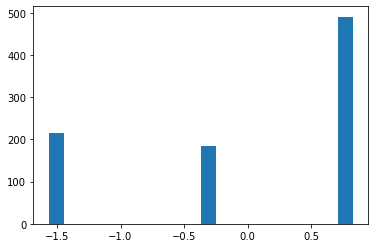

In [126]:
## plot histogram for pclass feature
plt.hist(df_scaled[:,1],bins=20)    ## 1 is column index for pclass

(array([ 30.,  17.,  15.,   9.,  29.,  64.,  67.,  70., 260.,  62.,  51.,
         40.,  35.,  27.,  35.,  23.,  15.,   9.,  11.,  11.,   4.,   2.,
          3.,   1.,   1.]),
 array([-2.22415608, -1.97952766, -1.73489924, -1.49027082, -1.24564239,
        -1.00101397, -0.75638555, -0.51175713, -0.26712871, -0.02250029,
         0.22212813,  0.46675655,  0.71138498,  0.9560134 ,  1.20064182,
         1.44527024,  1.68989866,  1.93452708,  2.1791555 ,  2.42378392,
         2.66841235,  2.91304077,  3.15766919,  3.40229761,  3.64692603,
         3.89155445]),
 <BarContainer object of 25 artists>)

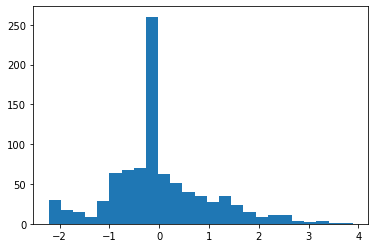

In [127]:
## plotting histogram for 'age' feature
plt.hist(df_scaled[:,2],bins=25)

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <BarContainer object of 25 artists>)

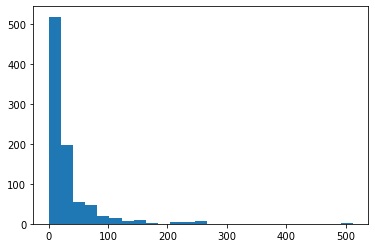

In [128]:
plt.hist(dataframe['fare'],bins=25)

## 2. Min Max Scaling (### CNN)---Deep Learning Techniques
Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [130]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(x_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


In [131]:
df_min_max = pd.DataFrame(min_max.fit_transform(dataframe))

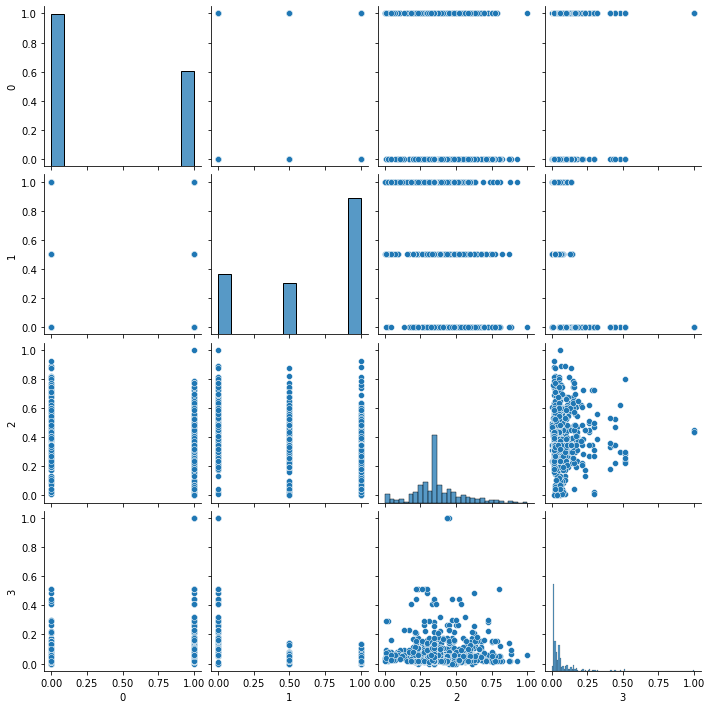

In [132]:
## pair plot
import seaborn as sns

sns.pairplot(df_min_max)

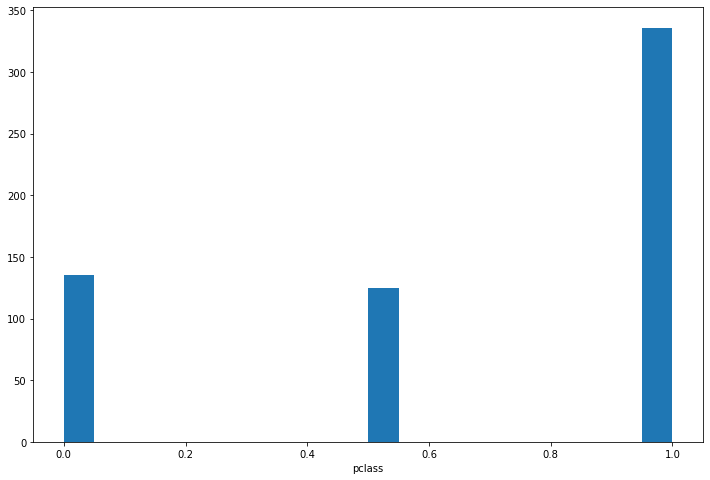

In [133]:
plt.figure(figsize=(12,8))
plt.hist(df_minmax[0],bins=20)
plt.xlabel("pclass")
plt.show()

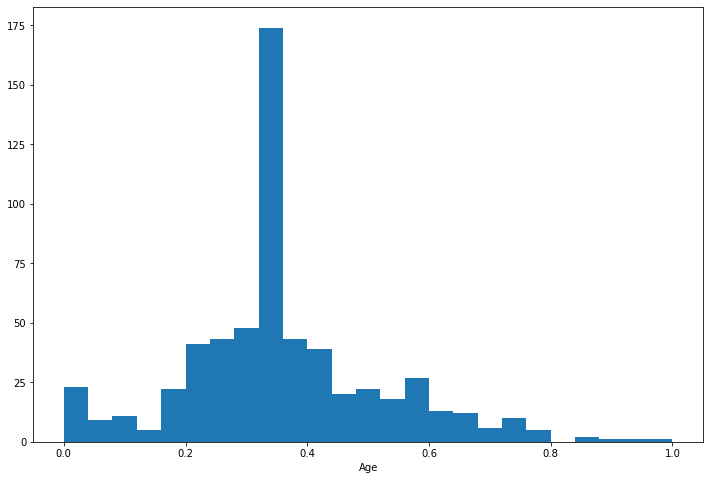

In [134]:
plt.figure(figsize=(12,8))
plt.hist(df_minmax[1],bins=25)
plt.xlabel("Age")
plt.show()

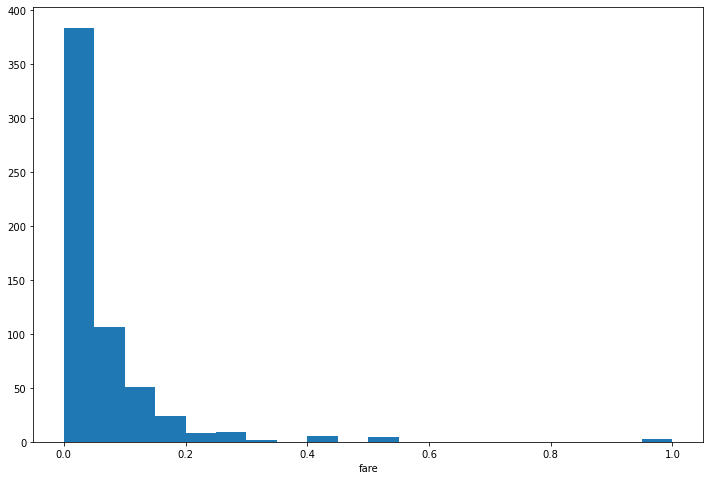

In [135]:
plt.figure(figsize=(12,8))
plt.hist(df_minmax[2],bins=20)
plt.xlabel("fare")
plt.show()

## 3. Robust Scaler
    Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

    IQR = 75th quantile - 25th quantile

    X_scaled = (X - X.median) / IQR

    In example data : 0,1,2,3,4,5,6,7,8,9,10

        a. 9-90 percentile---90% of all values in this group is less than 9.
        b. 1-10 precentile---10% of all values in this group is less than 1.

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [137]:
x_train

,pclass,age,fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [138]:
y_train

6      0
718    0
685    0
73     0
882    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: survived, Length: 596, dtype: int64

In [139]:
x_test

,pclass,age,fare
709,3,28.0,15.2458
439,2,31.0,10.5000
840,3,20.0,7.9250
720,2,6.0,33.0000
39,3,14.0,11.2417
...,...,...,...
715,3,19.0,7.6500
525,3,40.5,7.7500
381,3,1.0,15.7417
140,3,28.0,15.2458


In [140]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
715    0
525    0
381    1
140    0
173    0
Name: survived, Length: 295, dtype: int64

In [141]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(x_train))
df_robust.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


In [142]:
scaler.transform(x_test)

array([[ 0.00000000e+00,  0.00000000e+00,  3.39014989e-02],
       [-1.00000000e+00,  2.30769231e-01, -1.69344754e-01],
       [ 0.00000000e+00, -6.15384615e-01, -2.79623126e-01],
       [-1.00000000e+00, -1.69230769e+00,  7.94252677e-01],
       [ 0.00000000e+00, -1.07692308e+00, -1.37580300e-01],
       [-2.00000000e+00, -1.53846154e-01,  2.75785011e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.87117773e-01],
       [ 0.00000000e+00, -9.23076923e-01,  1.51854390e-01],
       [ 0.00000000e+00, -9.23076923e-01, -2.87117773e-01],
       [-2.00000000e+00, -6.92307692e-01,  5.06599572e-01],
       [-2.00000000e+00,  6.92307692e-01,  1.65506638e+00],
       [ 0.00000000e+00,  1.23076923e+00, -2.74269807e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.71627409e-01],
       [ 0.00000000e+00,  1.53846154e-01, -3.09601713e-01],
       [-1.00000000e+00,  6.15384615e-01, -6.22783726e-02],
       [-2.00000000e+00, -9.23076923e-01,  1.06834261e+00],
       [-2.00000000e+00,  1.07692308e+00

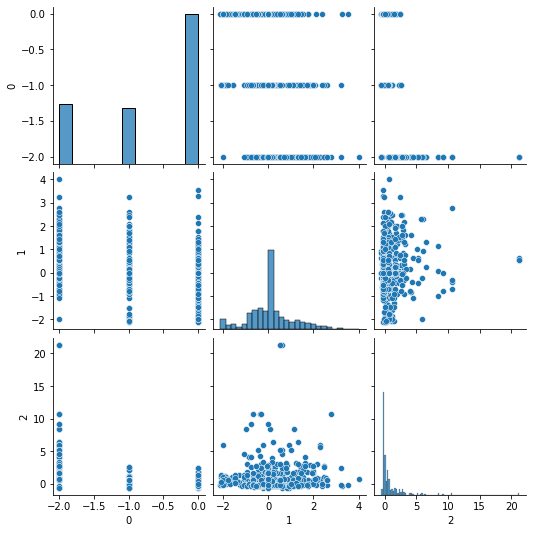

In [143]:
import seaborn as sns
sns.pairplot(df_robust)

In [144]:
df_robust_scaler = pd.DataFrame(scaler.fit_transform(dataframe))
df_robust_scaler

,0,1,2,3
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


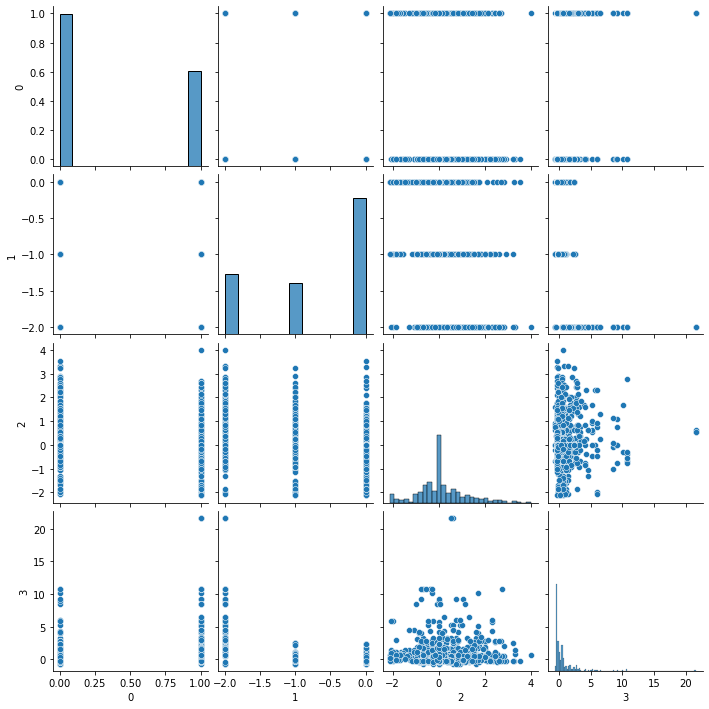

In [145]:
import seaborn as sns

sns.pairplot(df_robust_scaler)

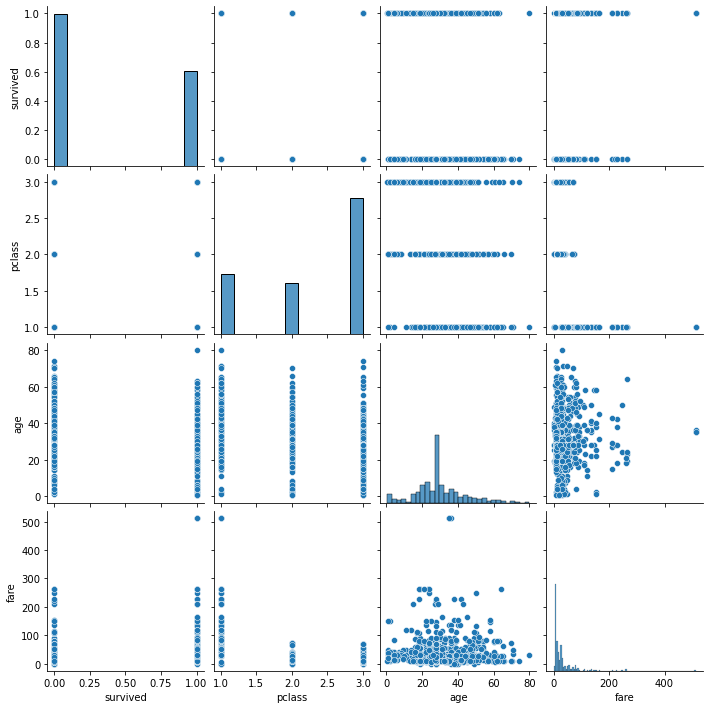

In [146]:
sns.pairplot(dataframe)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

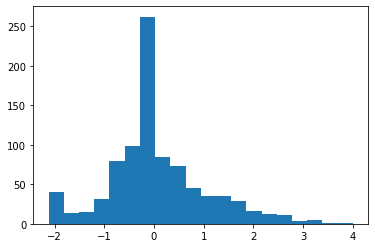

In [148]:
plt.hist(df_robust_scaler[2],bins=20)

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([-0.62600478,  0.26154494,  1.14909466,  2.03664438,  2.9241941 ,
         3.81174382,  4.69929353,  5.58684325,  6.47439297,  7.36194269,
         8.24949241,  9.13704213, 10.02459185, 10.91214157, 11.79969129,
        12.68724101, 13.57479073, 14.46234045, 15.34989017, 16.23743989,
        17.12498961, 18.01253933, 18.90008904, 19.78763876, 20.67518848,
        21.5627382 ]),
 <BarContainer object of 25 artists>)

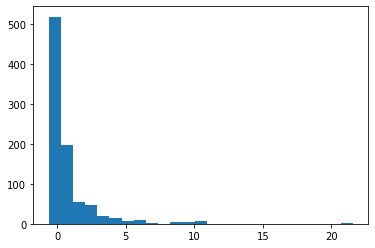

In [149]:
plt.hist(df_robust_scaler[3],bins=25)

## 4. Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed(-Accuracy -Performance)::

    1. logarithmic transformation
    2. reciprocal transformation
    3. square root transformation
    4. exponential transformation (more general, you can use any exponent)
    5. boxcox transformation

In [150]:
path = '/home/ashish/projects/Feature_transformations/titanic_train.csv'
data = pd.read_csv(path,usecols=['Age','Fare','Survived'])
data

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [152]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [153]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [155]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

In [156]:
## If you want to check whether feature is guassian or normal distributed use Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

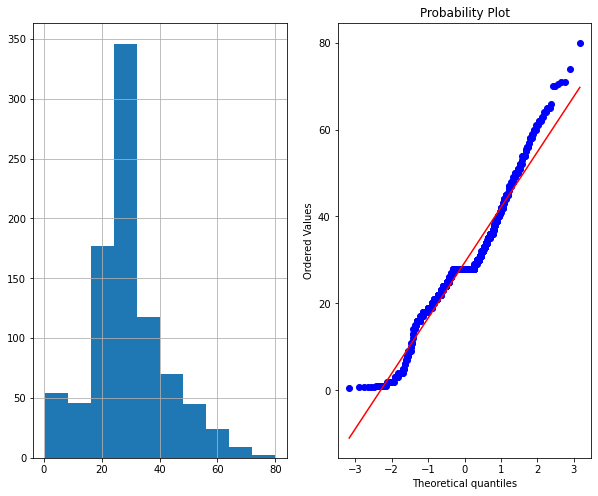

In [157]:
plot_data(data,'Age')

## Logarithmic Transformation on 'Age'

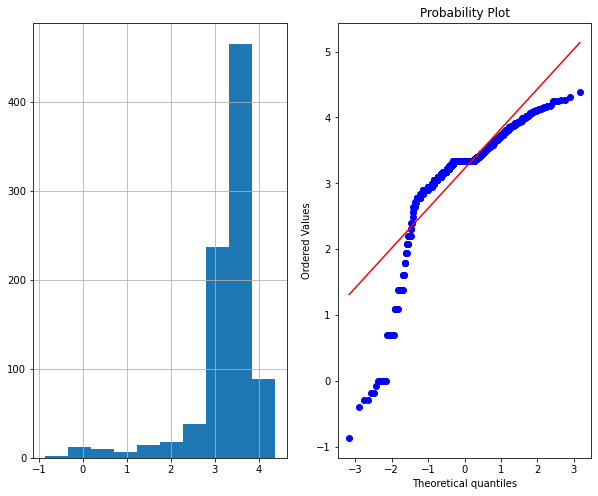

In [158]:
import numpy as np
data['Age_log'] = np.log(data['Age'])
plot_data(data,'Age_log') 

The logarthmic Transfromation is not giving a very efficient normal distribution as we can see large no. of points are away from the red line.

## Reciprocal Transformation

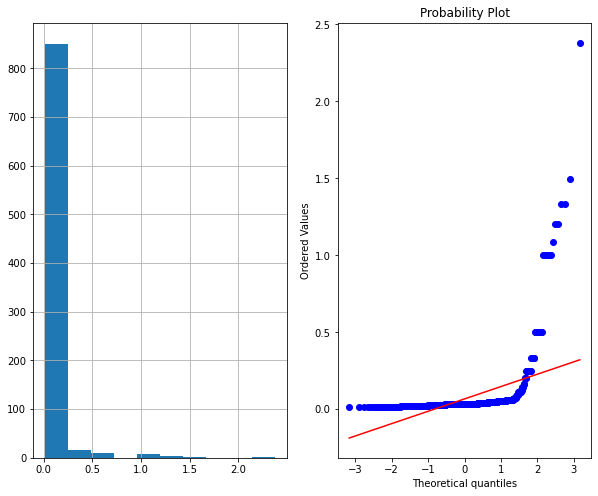

In [161]:
data['Age_recip'] = 1/data['Age']
plot_data(data,'Age_recip')

## Square-Root Transformation

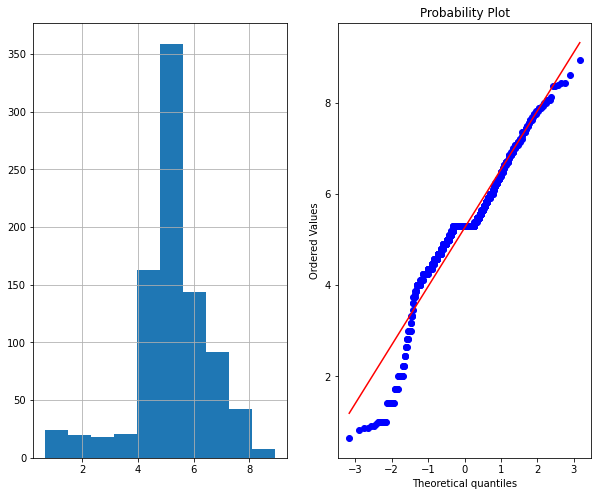

In [162]:
data['Square_Age'] = data['Age']**(1/2)
plot_data(data,'Square_Age')

## Exponential Transformation

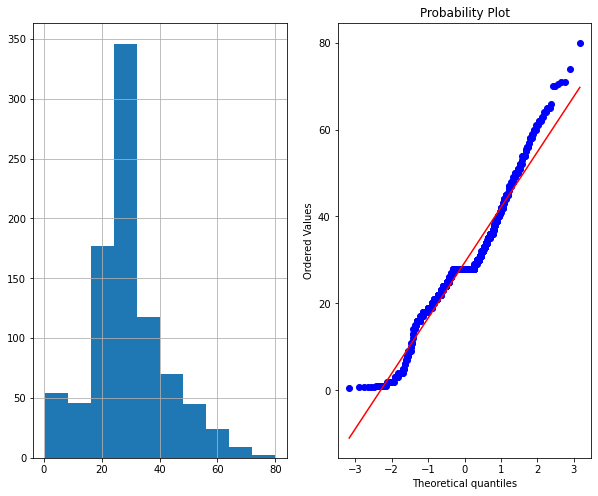

In [163]:
data['expo_age'] = data['Age']**(1/1.2)
plot_data(data,'Age')

## BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [164]:
## the second returned argument i.e parameters is the lambda that maximizes the log-likelihood function.
data['Age_BoxCox'],parameters = stats.boxcox(data['Age'])

In [165]:
print(parameters)

0.7964531473656952


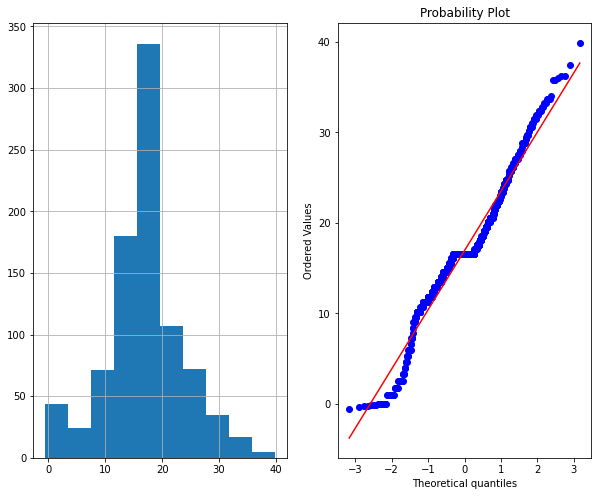

In [166]:
plot_data(data,'Age_BoxCox')

NOW,  Take another Feature --> Fare and try to transfrom it for better

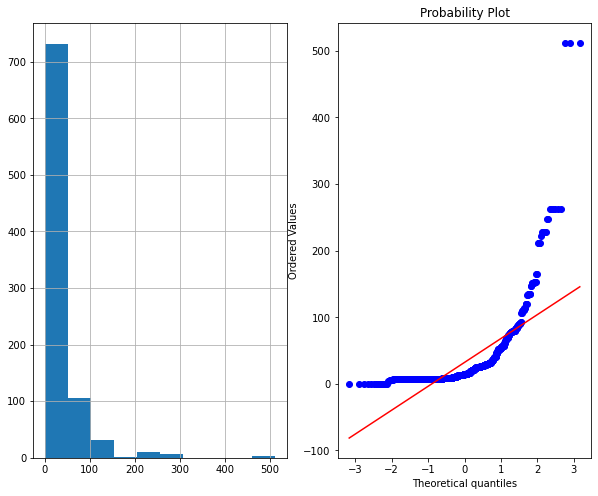

In [169]:
plot_data(data,'Fare')

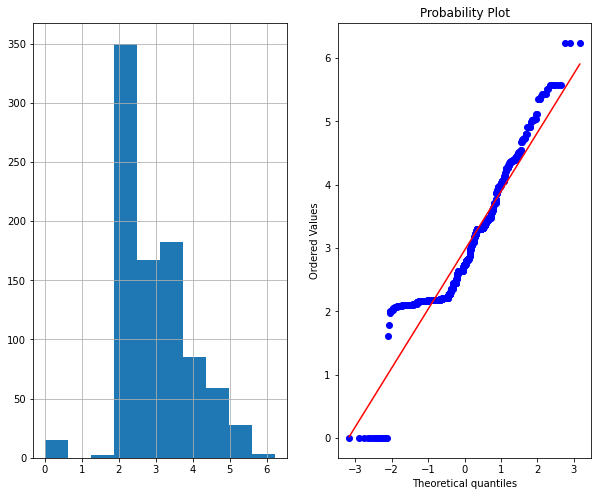

In [172]:
## Logarthmic transformation
data['log_fare'] = np.log1p(data['Fare'])
plot_data(data,'log_fare')

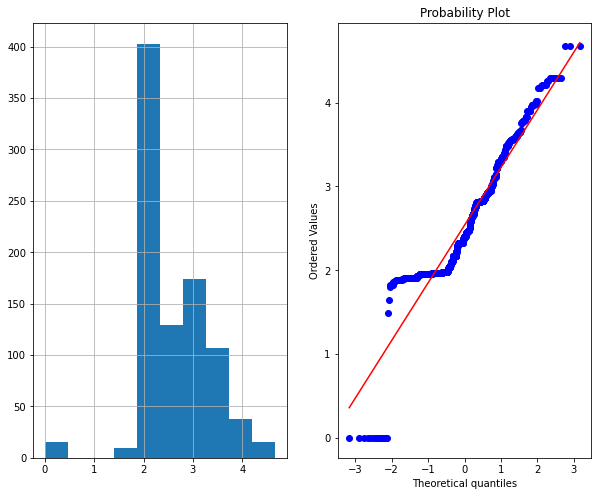

In [175]:
## the second returned argument i.e.parameters is the lambda that maximizes the log-likelihood function.
data['BoxCox_Fare'],parameters = stats.boxcox(data['Fare']+1)
plot_data(data,'BoxCox_Fare')

And So on Feature Transformations can be applied to many of the features present in a dataset.